# EGG for one patient 

In [21]:
import mne
import numpy as np
from mne.time_frequency import tfr_morlet
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#raw = mne.io.read_raw_fif('sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif', preload=True)
#import mne

# Adjust the filename if needed
file_path = '/Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif'
# Adjust the filename if needed
#file_path = '/Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif'
epochs = mne.read_epochs(file_path, preload=True)


Reading /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
206 matching events found
No baseline correction applied
0 projection items activated


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s


No baseline correction applied


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:  1.8min finished


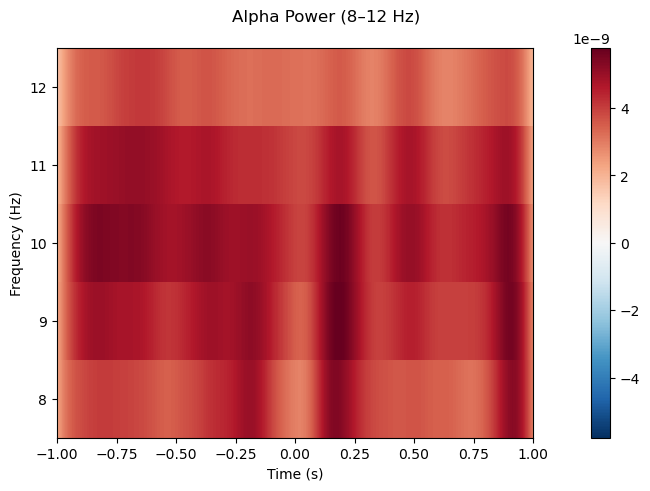

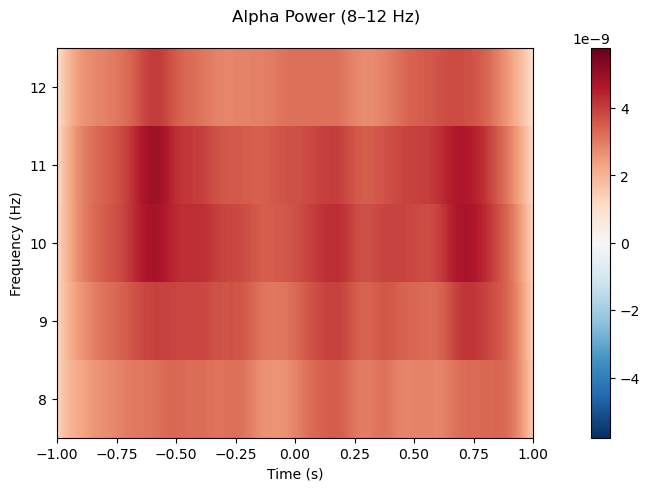

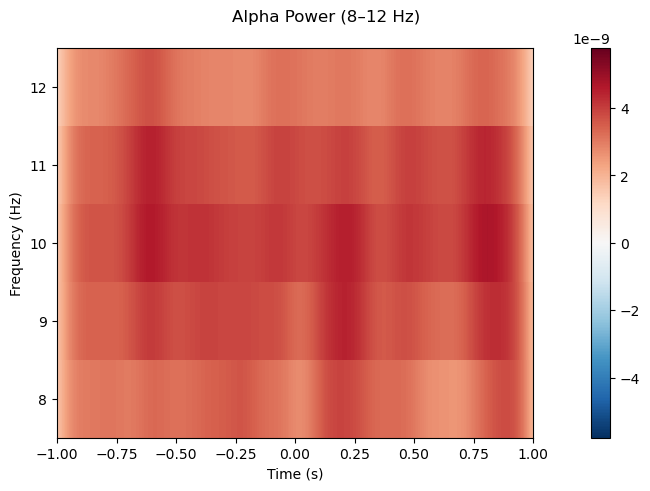

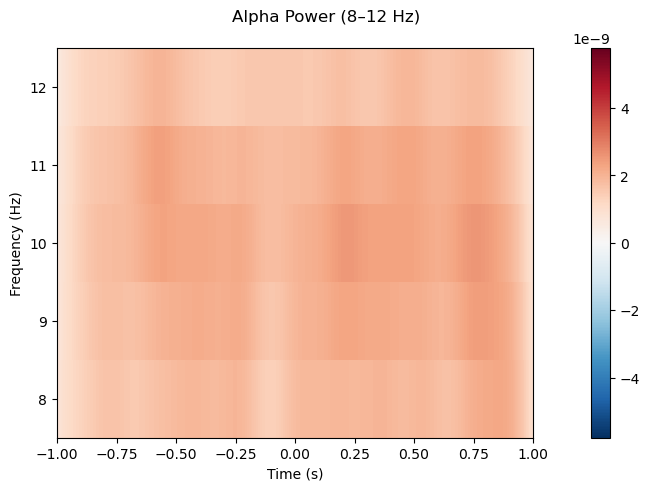

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s remaining:    0.0s


No baseline correction applied


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:  2.8min finished


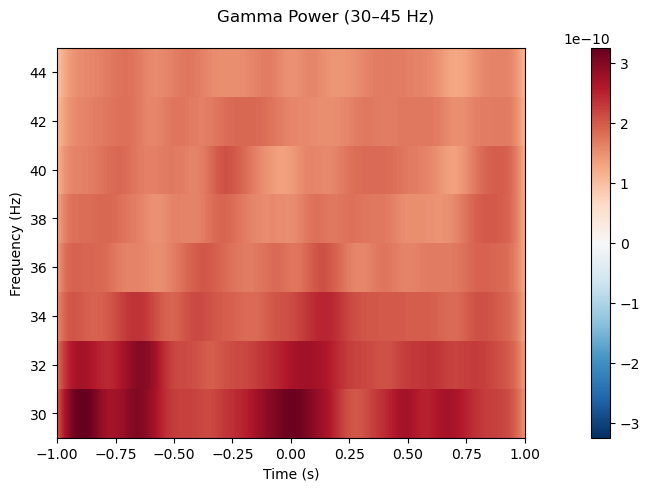

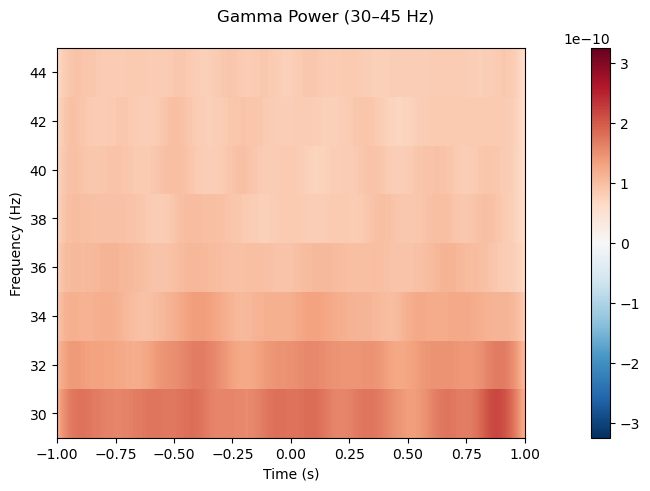

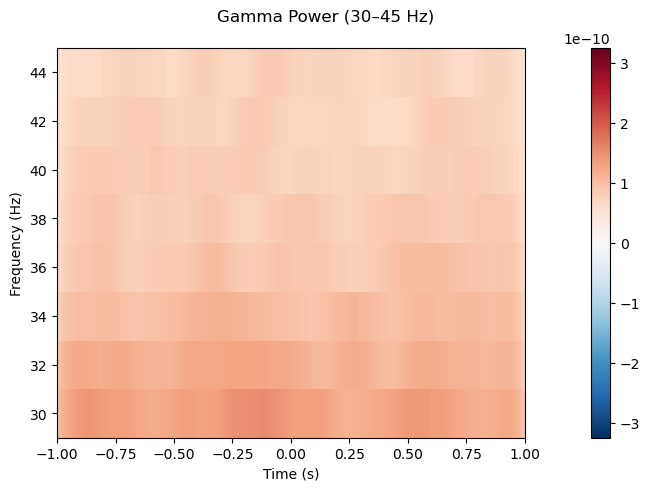

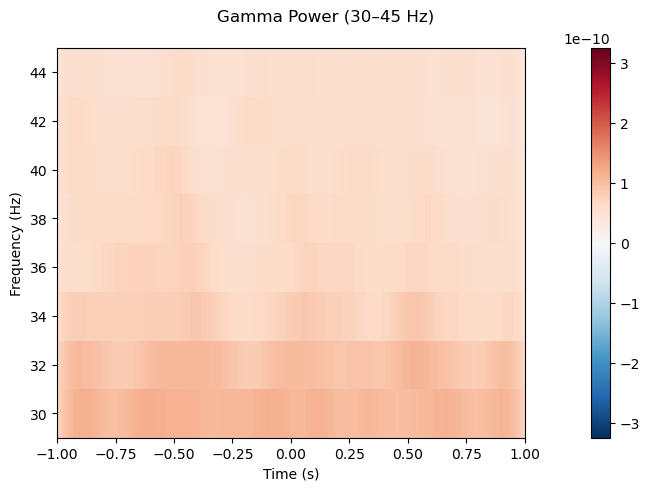

[<Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>]

In [2]:
# Define frequencies of interest (in Hz)
freqs = np.arange(8, 13, 1)   # Alpha: 8–12 Hz
gamma_freqs = np.arange(30, 46, 2)  # Gamma: 30–45 Hz
n_cycles = freqs / 2.0  # More cycles for better frequency resolution
# Define the electrodes you want to plot
selected_electrodes = ['E59', 'E92', 'E53', 'E87']

# Alpha power
tfr_alpha = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=True)
tfr_alpha.plot(picks=selected_electrodes, title="Alpha Power (8–12 Hz)")

# Gamma power
tfr_gamma = tfr_morlet(epochs, freqs=gamma_freqs, n_cycles=gamma_freqs / 2.0, return_itc=False, average=True)
tfr_gamma.plot(picks=selected_electrodes, title="Gamma Power (30–45 Hz)")
#try using multitaper or welch

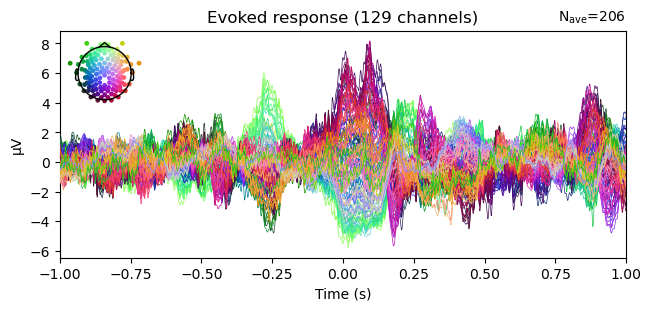

(('E12', 0.08, -5.0304251107677735e-06), ('E77', 0.309, 3.787165931433075e-06))

In [23]:
# Compute evoked response
evoked = epochs.average()

# Plot ERP
evoked.plot(picks="eeg", titles="Evoked response")

# Extract peak amplitude and latency for N1 (~100 ms) and P3 (~300 ms)
#n1_latency, n1_amplitude = evoked.get_peak(tmin=0.08, tmax=0.14, mode='neg', return_amplitude=True)
#p3_latency, p3_amplitude = evoked.get_peak(tmin=0.3, tmax=0.5, mode='pos', return_amplitude=True)

#print(f"N1 Peak: {n1_amplitude:.2f} µV at {n1_latency*1000:.1f} ms")
#print(f"P3 Peak: {p3_amplitude:.2f} µV at {p3_latency*1000:.1f} ms")


peak_results_n1 = evoked.get_peak(tmin=0.08, tmax=0.14, mode='neg', return_amplitude=True)
peak_results_p3 = evoked.get_peak(tmin=0.3, tmax=0.5, mode='pos', return_amplitude=True)
peak_results_n1, peak_results_p3

#p3_latency, p3_amplitude = evoked.get_peak(tmin=0.3, tmax=0.5, mode='pos', return_amplitude=True)

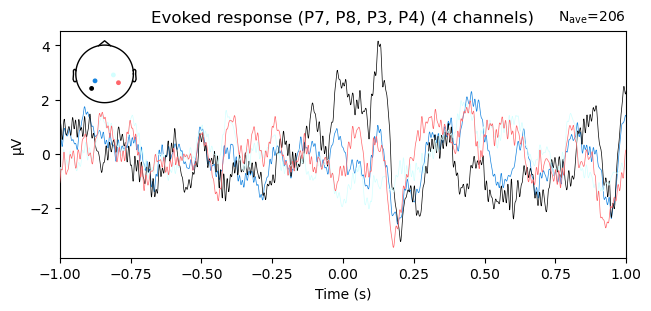

(('E92', 0.178, -3.446999213700715e-06),
 ('E53', 0.454, 2.2946953252938786e-06))

In [24]:
# Pick only electrodes of interest (P7, P8, P3, P4)
selected_electrodes = [59, 92, 53, 87]
picks = ['E53', 'E59', 'E87', 'E92']
# Compute evoked response
evoked = epochs.average(picks=picks)

# Plot ERP for selected channels
evoked.plot(picks=picks, titles="Evoked response (P7, P8, P3, P4)")

# Extract peak amplitude and latency for N1 (~100 ms) and P3 (~300 ms)
peak_results_n1 = evoked.get_peak(tmin=0.08, tmax=0.25, mode='neg', return_amplitude=True)
peak_results_p3 = evoked.get_peak(tmin=0.3, tmax=0.5, mode='pos', return_amplitude=True)
peak_results_n1, peak_results_p3
#print(f"N1 Peak: {n1_amplitude:.2f} µV at {n1_latency*1000:.1f} ms")
#print(f"P3 Peak: {p3_amplitude:.2f} µV at {p3_latency*1000:.1f} ms")


# For loop for multiple patients

In [25]:
conj_conditions = [
    'vs/display/search/a5/cc',
    'vs/display/search/a9/cc',
    'vs/display/search/at/cc'
]

# ROIs
roi_channels = ['E59', 'E92', 'E53', 'E87']  # P7, P8, P3, P4

# Frequency bands
bands = {'alpha': (8, 13), 'gamma': (30, 45)}

# Final results
all_measures = []

# Epoch files
epoch_files = [
    "/Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif",
    "/Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif",
]

for filepath in epoch_files:
    print(f"Processing {filepath}")
    ep = mne.read_epochs(filepath, preload=True)

    # Select only conjunction conditions that exist in current file
    existing = [cond for cond in conj_conditions if cond in ep.event_id]
    if not existing:
        print(f"No conjunction conditions found in {filepath}, skipping.")
        continue

    condition_epochs = ep[existing]

    # Average evoked for ROI channels
    evoked = condition_epochs.average(picks=roi_channels)
    # Get N1 (~100ms, negative peak)
    # Get N1 (~100ms, negative peak)
    n1_lat, n1_chan, n1_amp = evoked.get_peak(tmin=0.08, tmax=0.14, mode='neg', return_amplitude=True)
    p3_lat, p3_chan, p3_amp = evoked.get_peak(tmin=0.3, tmax=0.5, mode='pos', return_amplitude=True)
    

    # Compute PSD using multitaper, only EEG channels
    picks = mne.pick_types(condition_epochs.info, eeg=True)
    psd = condition_epochs.compute_psd(method='multitaper', fmin=1, fmax=40, picks=picks)
    psds, freqs = psd.get_data(return_freqs=True)

    # Average across epochs
    avg_psd = psds.mean(axis=0)  # shape: (n_channels, n_freqs)

    # Get correct channel names for picked channels
    picked_ch_names = [condition_epochs.ch_names[i] for i in picks]

    # Create PSD DataFrame
    psd_df = pd.DataFrame(avg_psd, index=picked_ch_names, columns=freqs)

    # Band power calculation (on frontal ROI)
    band_powers = {}
    for band_name, (fmin, fmax) in bands.items():
        try:
            band_power = psd_df.loc[roi_channels, (psd_df.columns > fmin) & (psd_df.columns < fmax)].mean().mean()
        except KeyError:
            band_power = None  # If some frontal channels are missing
        band_powers[band_name] = band_power
        
    # Get subject and diagnosis
    subject_id = filepath.split('/')[-1].split('-')[1].split('_')[0]
    diagnosis = 'asd' if 'P' in subject_id else 'control'

    # Append all measures to list
    all_measures.append({
        'subject': subject_id,
        'diagnosis': diagnosis,
        'N1_amp': n1_amp,
        'N1_lat': n1_chan,
        'N1_chan': n1_lat,
        'P3b_amp': p3_amp,
        'P3b_lat': p3_chan,
        'P3b_chan': p3_lat,
        'alpha_power': band_powers.get('alpha'),
        'gamma_power': band_powers.get('gamma')
    })

# Final DataFrame
results_df = pd.DataFrame(all_measures)
print(results_df)
results_df

Processing /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif
Reading /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
206 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Processing /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif
Reading /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
  subject diagnosis    N1_amp  N1_lat N1_chan   P3b_amp  P3b_l

,subject,diagnosis,N1_amp,N1_lat,N1_chan,P3b_amp,P3b_lat,P3b_chan,alpha_power,gamma_power
0,1109P,asd,-0.000006,0.129,E87,0.000011,0.381,E59,2.973600e-09,1.147995e-10
1,1109M1,control,-0.000004,0.098,E87,0.000003,0.428,E59,7.831558e-10,7.528146e-11


In [32]:
conj_conditions = [
    'vs/display/search/a5/cc',
    'vs/display/search/a9/cc',
    'vs/display/search/at/cc'
]

# ROIs
roi_channels = ['E59', 'E92', 'E53', 'E87']  # P7, P8, P3, P4

# Frequency bands
bands = {'alpha': (8, 13), 'gamma': (30, 45)}

# Final results
all_measures = []

# Epoch files
epoch_files = [
    "/Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif",
    "/Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif",
]

for filepath in epoch_files:
    ep = mne.read_epochs(filepath, preload=True)

    # Select only conjunction conditions that exist in current file
    existing = [cond for cond in conj_conditions if cond in ep.event_id]
    if not existing:
        continue

    condition_epochs = ep[existing]

    # Average evoked for ROI channels
    evoked = condition_epochs.average(picks=roi_channels)
    # Get N1 (~100ms, negative peak)
    # Get N1 (~100ms, negative peak)
    n1_lat, n1_chan, n1_amp = evoked.get_peak(tmin=0.08, tmax=0.14, mode='neg', return_amplitude=True)
    p3_lat, p3_chan, p3_amp = evoked.get_peak(tmin=0.3, tmax=0.5, mode='pos', return_amplitude=True)
    

    # Compute PSD using multitaper, only EEG channels
    picks = mne.pick_types(condition_epochs.info, eeg=True)
    psd = condition_epochs.compute_psd(method='multitaper', fmin=1, fmax=40, picks=picks)
    psds, freqs = psd.get_data(return_freqs=True)

    # Average across epochs
    avg_psd = psds.mean(axis=0)  # shape: (n_channels, n_freqs)

    # Get correct channel names for picked channels
    picked_ch_names = [condition_epochs.ch_names[i] for i in picks]

    # Create PSD DataFrame
    psd_df = pd.DataFrame(avg_psd, index=picked_ch_names, columns=freqs)

    # Band power calculation (on frontal ROI)
    band_powers = {}
    for band_name, (fmin, fmax) in bands.items():
        try:
            band_power = psd_df.loc[roi_channels, (psd_df.columns > fmin) & (psd_df.columns < fmax)].mean().mean()
        except KeyError:
            band_power = None  # If some frontal channels are missing
        band_powers[band_name] = band_power
        
    # Get subject and diagnosis
    subject_id = filepath.split('/')[-1].split('-')[1].split('_')[0]
    diagnosis = 'asd' if 'P' in subject_id else 'control'

    # Append all measures to list
    all_measures.append({
        'subject': subject_id,
        'diagnosis': diagnosis,
        'N1_amp': n1_amp,
        'N1_lat': n1_chan,
        'N1_chan': n1_lat,
        'P3b_amp': p3_amp,
        'P3b_lat': p3_chan,
        'P3b_chan': p3_lat,
        'alpha_power': band_powers.get('alpha'),
        'gamma_power': band_powers.get('gamma')
    })

# Final DataFrame
results_df = pd.DataFrame(all_measures)
results_df

Reading /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
206 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Reading /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows


,subject,diagnosis,N1_amp,N1_lat,N1_chan,P3b_amp,P3b_lat,P3b_chan,alpha_power,gamma_power
0,1109P,asd,-0.000006,0.129,E87,0.000011,0.381,E59,2.973600e-09,1.147995e-10
1,1109M1,control,-0.000004,0.098,E87,0.000003,0.428,E59,7.831558e-10,7.528146e-11


In [33]:
# Condition mapping for easier labeling
conj_conditions = {
    'a5': 'vs/display/search/a5/cc',
    'a9': 'vs/display/search/a9/cc',
    'at': 'vs/display/search/at/cc'
}

# ROIs
roi_channels = ['E59', 'E92', 'E53', 'E87']  # P7, P8, P3, P4

# Frequency bands
bands = {'alpha': (8, 13), 'gamma': (30, 45)}

# Final results
all_measures = []

# Epoch files
epoch_files = [
    "/Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif",
    "/Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif",
]

for filepath in epoch_files:
    print(f"Processing {filepath}")
    ep = mne.read_epochs(filepath, preload=True)

    # Subject info
    subject_id = filepath.split('/')[-1].split('-')[1].split('_')[0]
    diagnosis = 'asd' if 'P' in subject_id else 'control'

    for condition_label, condition_path in conj_conditions.items():
        if condition_path not in ep.event_id:
            print(f"Condition {condition_path} not found in {filepath}, skipping.")
            continue

        # Get condition-specific epochs
        condition_epochs = ep[condition_path]

        # Evoked for ROI channels
        evoked = condition_epochs.average(picks=roi_channels)

        # N1 and P3b peaks
        n1_lat, n1_chan, n1_amp = evoked.get_peak(tmin=0.08, tmax=0.14, mode='neg', return_amplitude=True)
        p3_lat, p3_chan, p3_amp = evoked.get_peak(tmin=0.3, tmax=0.5, mode='pos', return_amplitude=True)

        # PSD calculation
        picks = mne.pick_types(condition_epochs.info, eeg=True)
        psd = condition_epochs.compute_psd(method='multitaper', fmin=1, fmax=40, picks=picks)
        psds, freqs = psd.get_data(return_freqs=True)
        avg_psd = psds.mean(axis=0)

        picked_ch_names = [condition_epochs.ch_names[i] for i in picks]
        psd_df = pd.DataFrame(avg_psd, index=picked_ch_names, columns=freqs)

        # Band powers
        band_powers = {}
        for band_name, (fmin, fmax) in bands.items():
            try:
                band_power = psd_df.loc[roi_channels, (psd_df.columns > fmin) & (psd_df.columns < fmax)].mean().mean()
            except KeyError:
                band_power = None
            band_powers[band_name] = band_power

        # Store results
        all_measures.append({
            'subject': subject_id,
            'diagnosis': diagnosis,
            'condition': condition_label,
            'N1_amp': n1_amp,
            'N1_lat': n1_lat,
            'N1_chan': n1_chan,
            'P3b_amp': p3_amp,
            'P3b_lat': p3_lat,
            'P3b_chan': p3_chan,
            'alpha_power': band_powers.get('alpha'),
            'gamma_power': band_powers.get('gamma')
        })

# Create final DataFrame
results_df = pd.DataFrame(all_measures)
results_df

Processing /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif
Reading /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
206 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Processing /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif
Reading /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
 

,subject,diagnosis,condition,N1_amp,N1_lat,N1_chan,P3b_amp,P3b_lat,P3b_chan,alpha_power,gamma_power
0,1109P,asd,a5,-0.000005,E87,0.140,0.000013,E59,0.378,3.243293e-09,1.157568e-10
1,1109P,asd,a9,-0.000007,E87,0.118,0.000012,E59,0.312,2.500041e-09,1.245039e-10
2,1109P,asd,at,-0.000009,E87,0.128,0.000012,E59,0.400,3.056893e-09,1.087700e-10
3,1109M1,control,a5,-0.000003,E53,0.119,0.000005,E59,0.432,6.922079e-10,7.534543e-11
4,1109M1,control,a9,-0.000006,E53,0.125,0.000006,E92,0.397,8.221113e-10,7.696529e-11
5,1109M1,control,at,-0.000005,E59,0.131,0.000002,E87,0.308,8.221502e-10,7.397062e-11


Processing /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif
Reading /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
206 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


Processing /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif
Reading /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


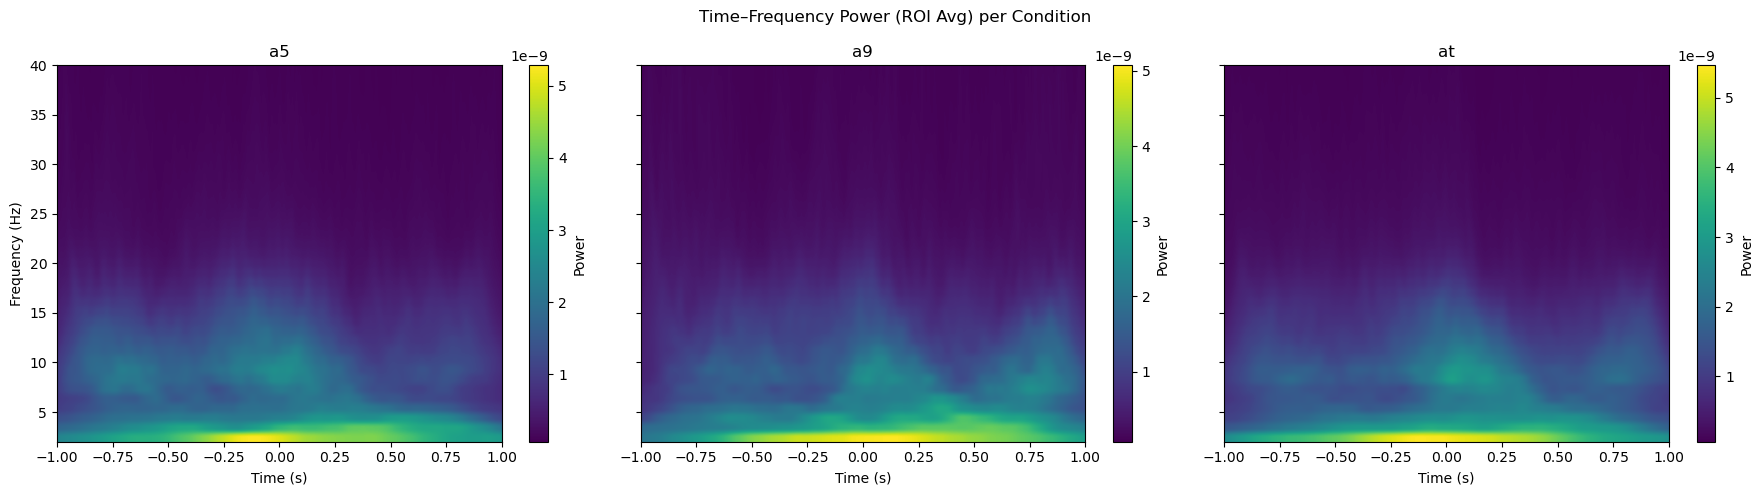

In [27]:
# Define parameters
roi_channels = ['E59', 'E92', 'E53', 'E87']
conj_conditions = ['vs/display/search/a5/cc', 'vs/display/search/a9/cc', 'vs/display/search/at/cc']
epoch_files = [
    "/Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif",
    "/Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif",
]

# TFR accumulation per condition
condition_tfr_data = {cond: [] for cond in conj_conditions}

for filepath in epoch_files:
    print(f"Processing {filepath}")
    ep = mne.read_epochs(filepath, preload=True)
    
    for cond in conj_conditions:
        if cond in ep.event_id:
            cond_epochs = ep[cond].copy().pick_channels(roi_channels)
            
            # Compute TFR using multitaper
            tfr = mne.time_frequency.tfr_multitaper(
                cond_epochs, freqs=np.arange(2, 41, 1), n_cycles=4, use_fft=True,
                return_itc=False, average=True)
            
            # Average across ROI channels
            roi_mean = tfr.data.mean(axis=0)  # shape: (freqs, times)
            condition_tfr_data[cond].append(roi_mean)

# Plot: frequency x time heatmaps for each condition
fig, axes = plt.subplots(1, len(conj_conditions), figsize=(18, 5), sharey=True)
times = tfr.times
freqs = tfr.freqs

for i, cond in enumerate(conj_conditions):
    if condition_tfr_data[cond]:
        mean_power = np.mean(condition_tfr_data[cond], axis=0)  # shape: (freqs, times)
        im = axes[i].imshow(
            mean_power, aspect='auto', origin='lower', 
            extent=[times[0], times[-1], freqs[0], freqs[-1]],
            cmap='viridis'
        )
        axes[i].set_title(cond.split('/')[-2])  # 'a5', 'a9', or 'at'
        axes[i].set_xlabel('Time (s)')
        if i == 0:
            axes[i].set_ylabel('Frequency (Hz)')
        fig.colorbar(im, ax=axes[i], orientation='vertical', label='Power')

plt.suptitle('Time–Frequency Power (ROI Avg) per Condition')
plt.tight_layout()
plt.show()


In [28]:
# Define condition groups
cs_conditions = [
    'vs/display/search/a5/cs',
    'vs/display/search/a9/cs',
    'vs/display/search/at/cs',
]

ca_conditions = [
    'vs/display/search/a5/ca',
    'vs/display/search/a9/ca',
    'vs/display/search/at/ca',
]

cc_conditions = [
    'vs/display/search/a5/cc',
    'vs/display/search/a9/cc',
    'vs/display/search/at/cc',
]

condition_sets = {
    'all_conditions': cs_conditions + ca_conditions + cc_conditions,
    'single_conditions': cs_conditions + ca_conditions,
    'conjunction_conditions': cc_conditions,
}

# ROI channels
roi_channels = ['E59', 'E92', 'E53', 'E87']  # P7, P8, P3, P4

# Frequency bands
bands = {'alpha': (8, 13), 'gamma': (30, 45)}

all_measures = []

epoch_files = [
    "/Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif",
    "/Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif",
]

for filepath in epoch_files:
    print(f"Processing {filepath}")
    ep = mne.read_epochs(filepath, preload=True)

    subject_id = filepath.split('/')[-1].split('-')[1].split('_')[0]
    diagnosis = 'asd' if 'P' in subject_id else 'control'

    for cond_set_name, cond_list in condition_sets.items():
        # Filter conditions that exist in this file
        existing_conds = [c for c in cond_list if c in ep.event_id]
        if not existing_conds:
            print(f"No {cond_set_name} found in {filepath}, skipping.")
            continue

        condition_epochs = ep[existing_conds]

        # Average evoked for ROI channels
        evoked = condition_epochs.average(picks=roi_channels)

        # Get N1 peak (~100ms, negative peak)
        n1_lat, n1_chan, n1_amp = evoked.get_peak(tmin=0.08, tmax=0.14, mode='neg', return_amplitude=True)

        # Get P3b peak (~300-500ms, positive peak)
        p3_lat, p3_chan, p3_amp = evoked.get_peak(tmin=0.3, tmax=0.5, mode='pos', return_amplitude=True)

        # Compute PSD using multitaper, EEG channels only
        picks = mne.pick_types(condition_epochs.info, eeg=True)
        psd = condition_epochs.compute_psd(method='multitaper', fmin=1, fmax=40, picks=picks)
        psds, freqs = psd.get_data(return_freqs=True)

        # Average across epochs
        avg_psd = psds.mean(axis=0)  # shape: (n_channels, n_freqs)

        picked_ch_names = [condition_epochs.ch_names[i] for i in picks]

        psd_df = pd.DataFrame(avg_psd, index=picked_ch_names, columns=freqs)

        # Band power calculation on ROI channels
        band_powers = {}
        for band_name, (fmin, fmax) in bands.items():
            try:
                band_power = psd_df.loc[roi_channels, (psd_df.columns > fmin) & (psd_df.columns < fmax)].mean().mean()
            except KeyError:
                band_power = None
            band_powers[band_name] = band_power

        # Append results
        all_measures.append({
            'subject': subject_id,
            'diagnosis': diagnosis,
            'condition_set': cond_set_name,
            'N1_amp': n1_amp,
            'N1_lat': n1_lat,
            'N1_chan': n1_chan,
            'P3b_amp': p3_amp,
            'P3b_lat': p3_lat,
            'P3b_chan': p3_chan,
            'alpha_power': band_powers.get('alpha'),
            'gamma_power': band_powers.get('gamma'),
        })

results_df = pd.DataFrame(all_measures)
results_df

Processing /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif
Reading /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
206 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Processing /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif
Reading /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
 

,subject,diagnosis,condition_set,N1_amp,N1_lat,N1_chan,P3b_amp,P3b_lat,P3b_chan,alpha_power,gamma_power
0,1109P,asd,all_conditions,-0.000005,E87,0.135,0.000013,E59,0.381,2.899331e-09,1.159023e-10
1,1109P,asd,single_conditions,-0.000009,E59,0.080,0.000015,E59,0.381,2.687133e-09,1.190531e-10
2,1109P,asd,conjunction_conditions,-0.000006,E87,0.129,0.000011,E59,0.381,2.973600e-09,1.147995e-10
3,1109M1,control,all_conditions,-0.000004,E53,0.116,0.000003,E59,0.433,7.252936e-10,7.473628e-11
4,1109M1,control,single_conditions,-0.000006,E53,0.116,0.000004,E59,0.433,5.599728e-10,7.317863e-11
5,1109M1,control,conjunction_conditions,-0.000004,E87,0.098,0.000003,E59,0.428,7.831558e-10,7.528146e-11


Reading /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
206 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. N

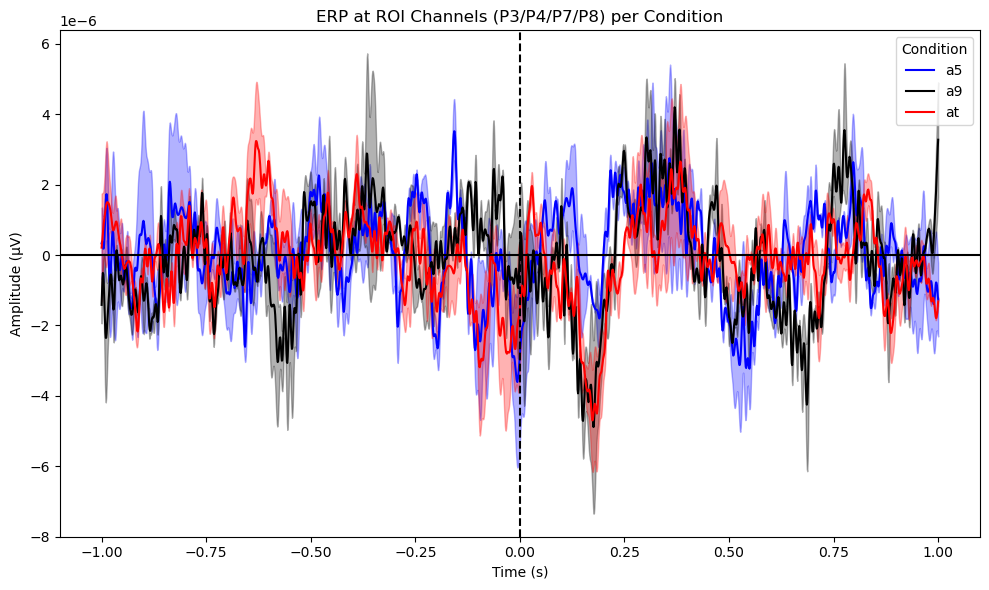

In [29]:
# Your setup
roi_channels = ['E59', 'E92', 'E53', 'E87']
conj_conditions = ['vs/display/search/a5/cc', 'vs/display/search/a9/cc', 'vs/display/search/at/cc']
epoch_files = [
    "/Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif",
    "/Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif",
]

# Initialize dictionary to store per-condition ERPs
condition_erps = {cond: [] for cond in conj_conditions}

for filepath in epoch_files:
    ep = mne.read_epochs(filepath, preload=True)

    for cond in conj_conditions:
        if cond in ep.event_id:
            cond_epochs = ep[cond].copy().pick_channels(roi_channels)
            # Average across ROI channels
            roi_data = cond_epochs.get_data().mean(axis=1)  # shape: (n_epochs, n_times)
            mean_per_sub = roi_data.mean(axis=0)  # shape: (n_times,)
            condition_erps[cond].append(mean_per_sub)

# Plotting
times = ep.times
plt.figure(figsize=(10, 6))

colors = {
    'vs/display/search/a5/cc': 'blue',
    'vs/display/search/a9/cc': 'black',
    'vs/display/search/at/cc': 'red'
}

for cond, waveforms in condition_erps.items():
    data = np.array(waveforms)  # shape: (n_subjects, n_times)
    mean = data.mean(axis=0)
    sem = data.std(axis=0) / np.sqrt(data.shape[0])
    
    plt.plot(times, mean, label=cond.split('/')[-2], color=colors[cond])
    plt.fill_between(times, mean - sem, mean + sem, color=colors[cond], alpha=0.3)

plt.axvline(0, color='k', linestyle='--')
plt.axhline(0, color='k')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title("ERP at ROI Channels (P3/P4/P7/P8) per Condition")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()


Reading /Users/audrey-annebeaudry/Downloads/sub-1109P_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
206 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/audrey-annebeaudry/Downloads/sub-1109M1_ses-01_task-VS_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


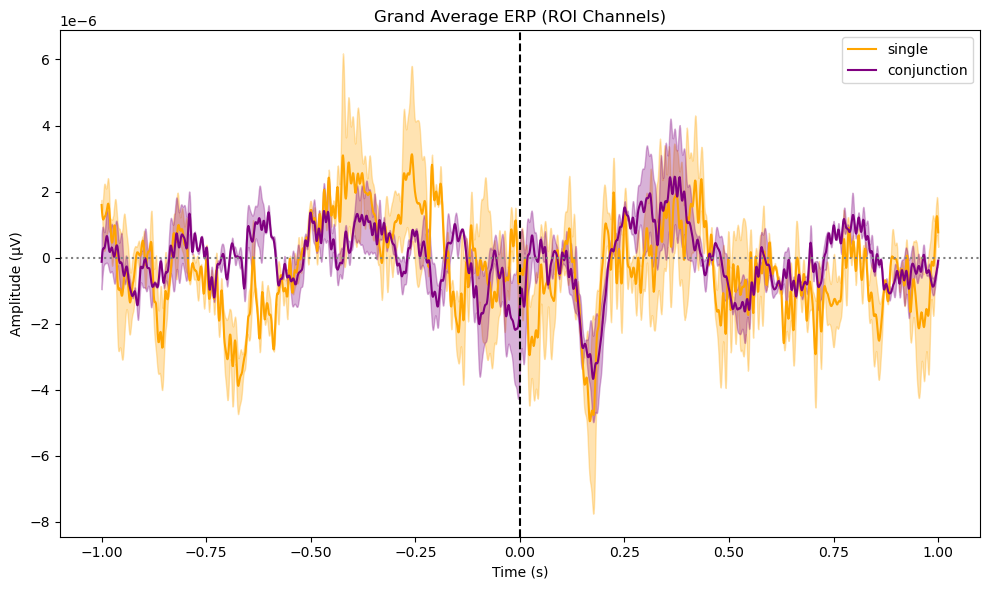

In [30]:
# Re-load epochs just for ERP waveform averaging
erp_by_detail = {'single': [], 'conjunction': []}
detail_conditions = {
    'single': ['vs/display/search/a5/cs', 'vs/display/search/a9/cs', 'vs/display/search/at/cs',
               'vs/display/search/a5/ca', 'vs/display/search/a9/ca', 'vs/display/search/at/ca'],
    'conjunction': ['vs/display/search/a5/cc', 'vs/display/search/a9/cc', 'vs/display/search/at/cc']
}

for filepath in epoch_files:
    ep = mne.read_epochs(filepath, preload=True)

    for detail, conds in detail_conditions.items():
        existing = [c for c in conds if c in ep.event_id]
        if not existing:
            continue
        epochs = ep[existing].copy().pick_channels(roi_channels)
        # Average across ROI channels and then across epochs
        erp_data = epochs.get_data().mean(axis=1).mean(axis=0)  # shape: (n_times,)
        erp_by_detail[detail].append(erp_data)

# Now average across participants
times = ep.times
plt.figure(figsize=(10, 6))
colors = {'single': 'orange', 'conjunction': 'purple'}

for detail in erp_by_detail:
    data = np.vstack(erp_by_detail[detail])  # shape: (n_subjects, n_times)
    mean = data.mean(axis=0)
    sem = data.std(axis=0) / np.sqrt(data.shape[0])
    plt.plot(times, mean, label=detail, color=colors[detail])
    plt.fill_between(times, mean - sem, mean + sem, color=colors[detail], alpha=0.3)

plt.axvline(0, color='k', linestyle='--')
plt.axhline(0, color='gray', linestyle=':')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title("Grand Average ERP (ROI Channels)")
plt.legend()
plt.tight_layout()
plt.show()